# Machine Learning with Scikit-Learn: Medical Insurance Premium Prediction

In [1]:
# Importing a library for mathematical operations.

import numpy as np

# Importing a library for data manipulation.

import pandas as pd

# Importing libraries for data visualization.

import matplotlib.pyplot as plt
import seaborn as sns

# Importing libraries for machine learning.

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

## Data Collection

In [2]:
# Reading data into a Pandas DataFrame.

data = pd.read_csv("Data.csv")

In [3]:
# Printing first five rows of data.

data.head()

,Age,Gender,BMI,Children,Smoker,Region,Premium
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data Cleaning

In [4]:
# Printing number of missing values in each column.

data.isna().sum()

Age         0
Gender      0
BMI         0
Children    0
Smoker      0
Region      0
Premium     0
dtype: int64

In [5]:
# Printing a concise summary of data.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1338 non-null   int64  
 1   Gender    1338 non-null   object 
 2   BMI       1338 non-null   float64
 3   Children  1338 non-null   int64  
 4   Smoker    1338 non-null   object 
 5   Region    1338 non-null   object 
 6   Premium   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Descriptive Statistics

In [6]:
# Calculating descriptive statistics.

data.describe()

,Age,BMI,Children,Premium
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Data Analysis

### Analysis 1:

Analyzing the correlation between premium and age.

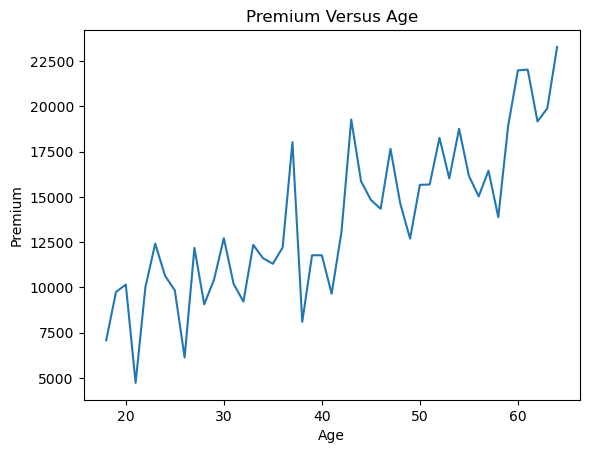

In [7]:
# Plotting a line plot for premium versus age.

plt.plot(data.drop(["Gender", "BMI", "Children", "Smoker", "Region"], axis=1).groupby(by="Age").mean())
plt.title("Premium Versus Age")
plt.xlabel("Age")
plt.ylabel("Premium")
plt.show()

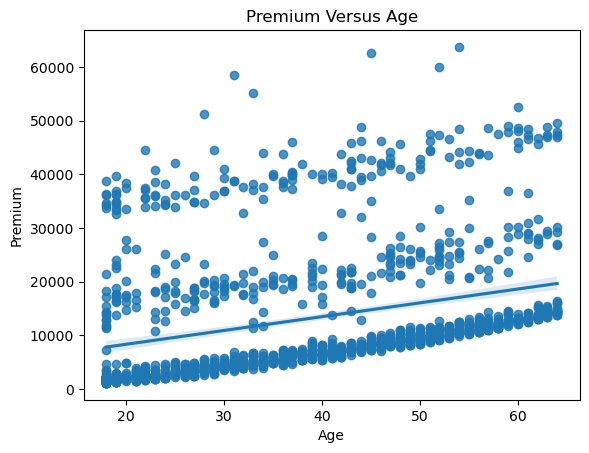

In [8]:
# Plotting a linear regression plot for premium versus age.

sns.regplot(data, x="Age", y="Premium")
plt.title("Premium Versus Age")
plt.xlabel("Age")
plt.ylabel("Premium")
plt.show()

### Conclusion 1:

Premium increases with the increase in age.

### Analysis 2:

Analyzing the correlation between premium and BMI.

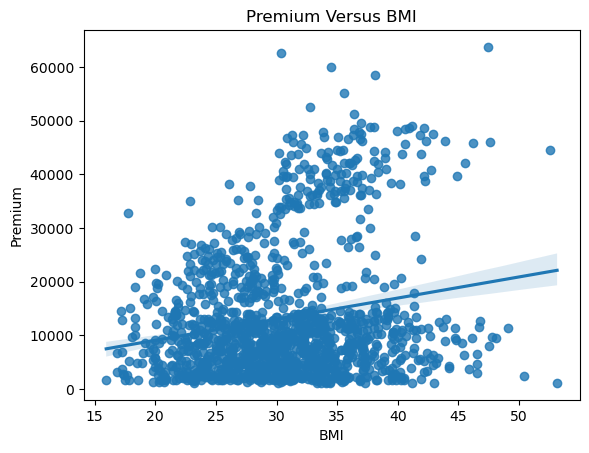

In [9]:
# Plotting a linear regression plot for premium versus BMI.

sns.regplot(data, x="BMI", y="Premium")
plt.title("Premium Versus BMI")
plt.xlabel("BMI")
plt.ylabel("Premium")
plt.show()

### Conclusion 2:

Premium does not significantly correlate to BMI.

### Analysis 3:

Analyzing the correlation between premium and smoker.

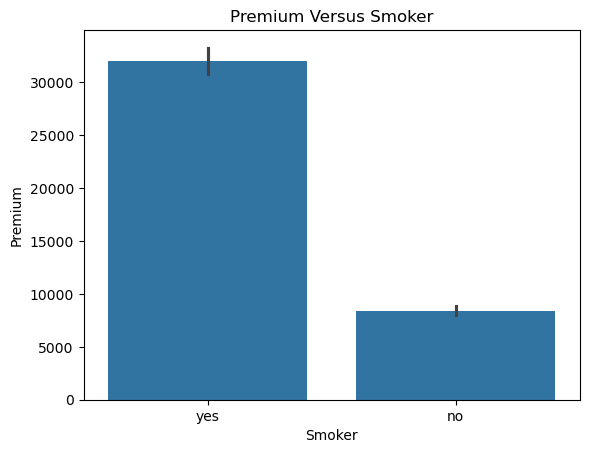

In [10]:
# Plotting a bar plot for premium versus smoker.

sns.barplot(data, x="Smoker", y="Premium")
plt.title("Premium Versus Smoker")
plt.xlabel("Smoker")
plt.ylabel("Premium")
plt.show()

### Conclusion 3:

Premium is higher for smokers.

## Feature Engineering

In [11]:
# Printing unique items in Gender column.

data["Gender"].unique()

array(['female', 'male'], dtype=object)

In [12]:
# Engineering Gender column.

data["Gender"] = data["Gender"].apply(lambda gender: 0 if gender == "female" else 1)

In [13]:
# Printing unique items in Smoker column.

data["Smoker"].unique()

array(['yes', 'no'], dtype=object)

In [14]:
# Engineering Smoker column.

data["Smoker"] = data["Smoker"].apply(lambda smoker: 0 if smoker == "no" else 1)

In [15]:
# Printing unique items in Region column.

data["Region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [16]:
# Engineering Region column.

# Converting Region column items into dummy variables.

region_dummies = pd.get_dummies(data["Region"], drop_first="True", dtype=int)

# Concatinating original data and dummy variables.

data = pd.concat([data, region_dummies], axis=1)

In [17]:
# Dropping Region column.

data.drop("Region", axis=1, inplace=True)

In [18]:
# Printing first five rows of data.

data.head()

,Age,Gender,BMI,Children,Smoker,Premium,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


## Correlation Analysis

In [19]:
# Calculating pairwise correlation of columns.

data.corr()

,Age,Gender,BMI,Children,Smoker,Premium,northwest,southeast,southwest
Age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,-0.000407,-0.011642,0.010016
Gender,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.011156,0.017117,-0.004184
BMI,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.135996,0.270025,-0.006205
Children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,0.024806,-0.023066,0.021914
Smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,-0.036945,0.068498,-0.036945
Premium,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,-0.039905,0.073982,-0.043210
northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320829,-0.346265,1.000000


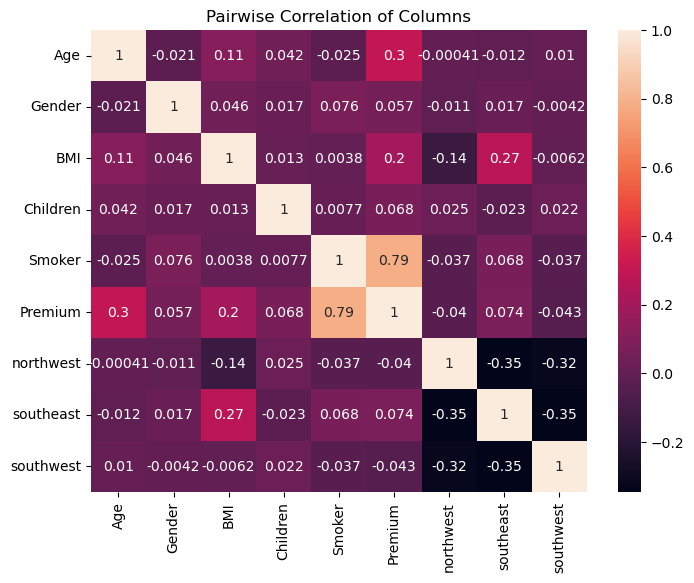

In [20]:
# Plotting a heatmap for pairwise correlation of columns.

plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True)
plt.title("Pairwise Correlation of Columns")
plt.show()

## Feature Selection

In [21]:
# Assigning feature matrix.

X = data.drop("Premium", axis=1)

# Assigning target vector.

y = data["Premium"]

In [22]:
# Printing feature matrix shape.

print("Feature Matrix Shape:", X.shape)

# Printing target vector shape.

print("Target Vector Shape:", y.shape)

Feature Matrix Shape: (1338, 8)
Target Vector Shape: (1338,)


## Machine Learning

In [23]:
# Splitting data into random train and test subsets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
# Building a random forest regressor model.

model = RandomForestRegressor()

# Fitting model on training set.

model.fit(X_train, y_train)

RandomForestRegressor()

In [25]:
# Predicting regression target for testing set.

y_prediction = model.predict(X_test)

In [26]:
# Printing coefficient of determination of prediction.

print("Accuracy Score: ", model.score(X_test, y_test))

# Printing R^2 regression score.

print("R^2 Score: ", r2_score(y_test, y_prediction))

# Printing mean absolute error.

print("Mean Absolute Error: ", mean_absolute_error(y_test, y_prediction))

# Printing mean absolute percentage error.

print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_test, y_prediction))

# Printing mean squared error.

print("Mean Squared Error: ", mean_squared_error(y_test, y_prediction))

# Printing root mean squared error.

print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_prediction)))

Accuracy Score:  0.8465891883104817
R^2 Score:  0.8465891883104817
Mean Absolute Error:  2642.0164981328057
Mean Absolute Percentage Error:  0.33216218930284924
Mean Squared Error:  22481534.612178613
Root Mean Squared Error:  4741.469667959357


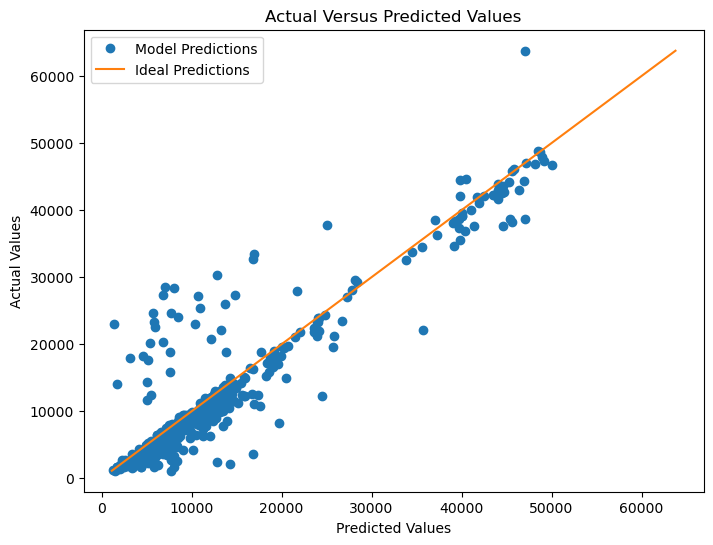

In [27]:
# Plotting a scatter plot for actual versus predicted values.

plt.figure(figsize=(8, 6))
plt.plot(y_prediction, y_test, "o", label="Model Predictions")
minimum = min(min(y_prediction), min(y_test))
maximum = max(max(y_prediction), max(y_test))
plt.plot([minimum, maximum], [minimum, maximum], label="Ideal Predictions")
plt.title("Actual Versus Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.legend()
plt.show()